# SAHI with Ultralytics YOLOE for Sliced Inference

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/obss/sahi/blob/main/demo/inference_for_ultralytics.ipynb)

## 0. Preparation

- Install latest version of SAHI and ultralytics:

In [ ]:
!pip install -U torch sahi ultralytics
!pip install ipywidgets

In [ ]:
# import os
# os.getcwd()

- Import required modules:

In [2]:
from IPython.display import Image

from sahi import AutoDetectionModel
from sahi.predict import get_prediction, get_sliced_prediction, predict
from sahi.utils.cv import read_image
from sahi.utils.file import download_from_url

- Download two test images:

In [2]:
download_from_url(
    "https://raw.githubusercontent.com/obss/sahi/main/demo/demo_data/small-vehicles1.jpeg",
    "demo_data/small-vehicles1.jpeg",
)
download_from_url(
    "https://raw.githubusercontent.com/obss/sahi/main/demo/demo_data/terrain2.png", "demo_data/terrain2.png"
)
download_from_url("https://ultralytics.com/images/boats.jpg", "demo_data/obb_test_image.png")

## 1. Standard Inference with an Ultralytics Model by Using Text Prompts

- Instantiate a detection model by defining model weight path and other parameters:

In [ ]:
detection_model = AutoDetectionModel.from_pretrained(
    model_type="yoloe",
    model_path="yoloe-11l-seg.pt",  # any yoloe-11s-seg.pt, yoloe-11m-seg.pt, yoloe-11l-seg.pt,yoloe-v8s-seg.pt, yoloe-v8m-seg.pt, yoloe-v8l-seg.pt model is supported # noqa: E501
    confidence_threshold=0.35,
    device="cpu",  # or 'cuda:0' if GPU is available
    category_mapping={"0": "person", "1": "car", "2": "traffic light"},  # Use string keys
)

### Set text prompts for specific classes

In [3]:
detection_model.model.set_classes(
    ["person", "car", "traffic light"], detection_model.model.get_text_pe(["person", "car", "traffic light"])
)

- Perform prediction by feeding the `get_prediction` function with an image path and a DetectionModel instance:

In [4]:
result = get_prediction("demo_data/small-vehicles1.jpeg", detection_model)

- Or perform prediction by feeding the `get_prediction` function with a numpy image and a DetectionModel instance:

In [5]:
result = get_prediction(read_image("demo_data/small-vehicles1.jpeg"), detection_model)

- Visualize predicted bounding boxes and masks over the original image:

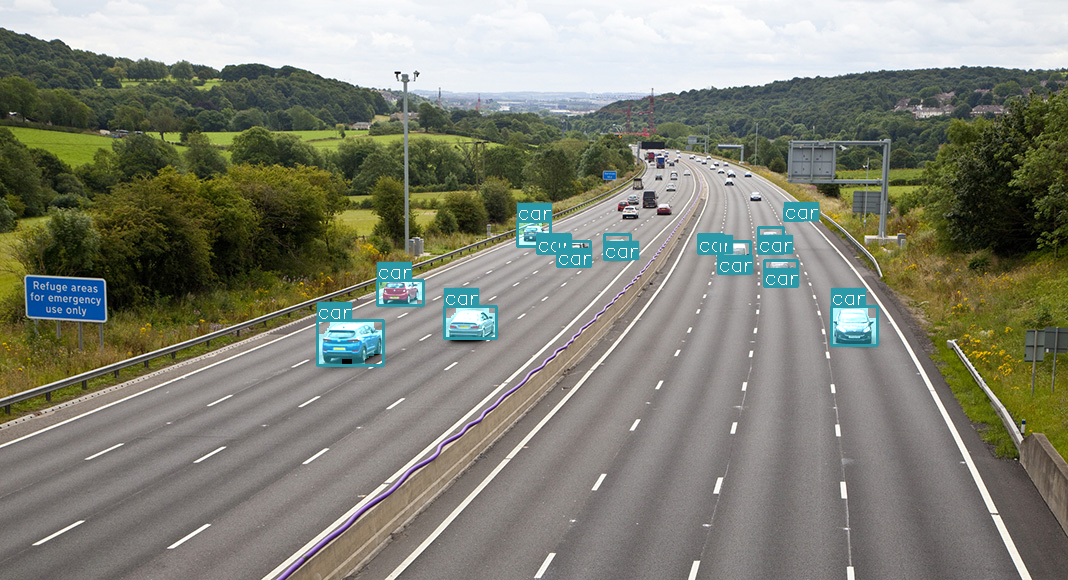

In [6]:
result.export_visuals(export_dir="demo_data/", hide_conf=True)

Image("demo_data/prediction_visual.png")

## 2. Sliced Inference with a YOLOE Model

- To perform sliced prediction we need to specify slice parameters. In this example we will perform prediction over slices of 256x256 with an overlap ratio of 0.2:

In [9]:
result = get_sliced_prediction(
    "demo_data/small-vehicles1.jpeg",
    detection_model,
    slice_height=512,
    slice_width=512,
    overlap_height_ratio=0.2,
    overlap_width_ratio=0.2,
)

Performing prediction on 6 slices.


- Visualize predicted bounding boxes and masks over the original image:

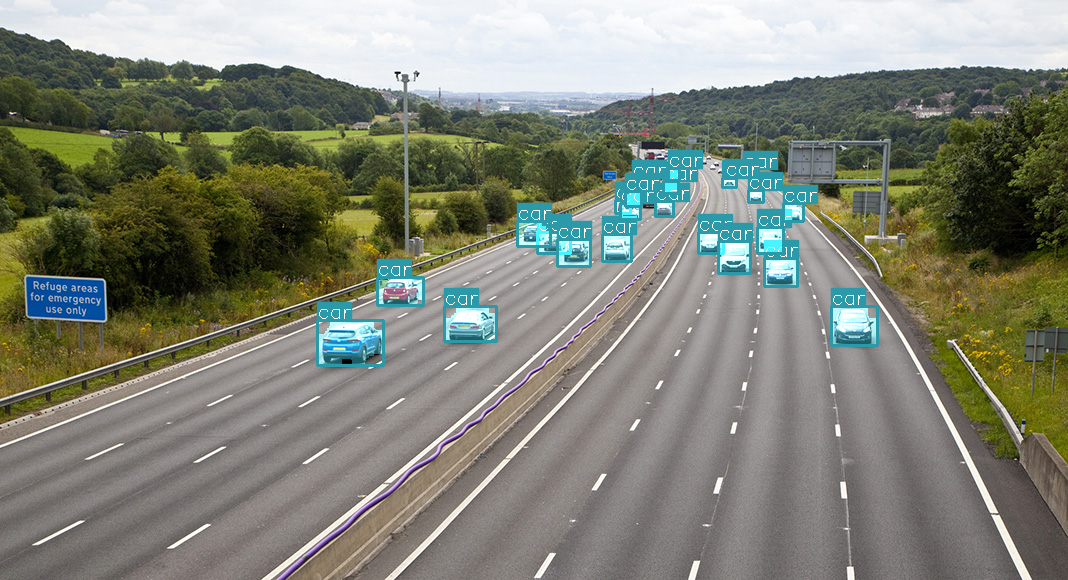

In [10]:
result.export_visuals(export_dir="demo_data/", hide_conf=True)

Image("demo_data/prediction_visual.png")

## 3. Prediction Result

- Predictions are returned as [sahi.prediction.PredictionResult](sahi/prediction.py), you can access the object prediction list as:

In [11]:
object_prediction_list = result.object_prediction_list

In [12]:
object_prediction_list[0]

ObjectPrediction<
    bbox: BoundingBox: <(444, 306, 496, 341), w: 52, h: 35>,
    mask: <sahi.annotation.Mask object at 0x13cf886a0>,
    score: PredictionScore: <value: 0.9042298197746277>,
    category: Category: <id: 1, name: car>>

- ObjectPrediction's can be converted to [COCO annotation](https://cocodataset.org/#format-data) format:

In [13]:
result.to_coco_annotations()[:3]

[{'image_id': None,
  'bbox': [444.0, 306.0, 52.0, 35.0],
  'score': 0.9042298197746277,
  'category_id': 1,
  'category_name': 'car',
  'segmentation': [[460,
    341,
    461,
    340,
    477,
    340,
    477,
    341,
    478,
    341,
    484,
    341,
    485,
    341,
    485,
    340,
    487,
    340,
    487,
    339,
    487,
    338,
    496,
    338,
    496,
    313,
    489,
    313,
    488,
    312,
    488,
    306,
    456,
    306,
    456,
    312,
    455,
    313,
    454,
    313,
    454,
    314,
    453,
    315,
    452,
    315,
    451,
    316,
    451,
    317,
    450,
    318,
    444,
    318,
    444,
    338,
    447,
    338,
    446,
    339,
    446,
    340,
    447,
    341]],
  'iscrowd': 0,
  'area': 1588},
 {'image_id': None,
  'bbox': [317.0, 320.0, 66.0, 45.0],
  'score': 0.8723216652870178,
  'category_id': 1,
  'category_name': 'car',
  'segmentation': [[350,
    358,
    351,
    359,
    352,
    359,
    352,
    365,
    364,
    36

- ObjectPrediction's can be converted to [COCO prediction](https://github.com/i008/COCO-dataset-explorer) format:

In [14]:
result.to_coco_predictions(image_id=1)[:3]

[{'image_id': 1,
  'bbox': [444.0, 306.0, 52.0, 35.0],
  'score': 0.9042298197746277,
  'category_id': 1,
  'category_name': 'car',
  'segmentation': [[460,
    341,
    461,
    340,
    477,
    340,
    477,
    341,
    478,
    341,
    484,
    341,
    485,
    341,
    485,
    340,
    487,
    340,
    487,
    339,
    487,
    338,
    496,
    338,
    496,
    313,
    489,
    313,
    488,
    312,
    488,
    306,
    456,
    306,
    456,
    312,
    455,
    313,
    454,
    313,
    454,
    314,
    453,
    315,
    452,
    315,
    451,
    316,
    451,
    317,
    450,
    318,
    444,
    318,
    444,
    338,
    447,
    338,
    446,
    339,
    446,
    340,
    447,
    341]],
  'iscrowd': 0,
  'area': 1588},
 {'image_id': 1,
  'bbox': [317.0, 320.0, 66.0, 45.0],
  'score': 0.8723216652870178,
  'category_id': 1,
  'category_name': 'car',
  'segmentation': [[350,
    358,
    351,
    359,
    352,
    359,
    352,
    365,
    364,
    365,
   

- ObjectPrediction's can be converted to [imantics](https://github.com/jsbroks/imantics) annotation format:

In [ ]:
!pip install imantics
result.to_imantics_annotations()[:3]

- ObjectPrediction's can be converted to [fiftyone](https://github.com/voxel51/fiftyone) detection format:

In [ ]:
!pip install fiftyone
result.to_fiftyone_detections()[:3]

## 4. Batch Prediction with YOLOE (Segmentation) Model

- Set model and directory parameters:

In [ ]:
model_type = "yoloe"
model_path = "yoloe-11l-seg.pt"  # any yoloe-11s-seg.pt, yoloe-11m-seg.pt, yoloe-11l-seg.pt,yoloe-v8s-seg.pt, yoloe-v8m-seg.pt, yoloe-v8l-seg.pt model is supported # noqa: E501
model_device = "cpu"  # or 'cuda:0' if GPU is available
model_confidence_threshold = 0.4

slice_height = 512
slice_width = 512
overlap_height_ratio = 0.2
overlap_width_ratio = 0.2

source_image_dir = "demo_data/"

- Perform sliced inference on given folder:

In [8]:
predict(
    model_type=model_type,
    model_path=model_path,
    model_device=model_device,
    model_confidence_threshold=model_confidence_threshold,
    source=source_image_dir,
    slice_height=slice_height,
    slice_width=slice_width,
    overlap_height_ratio=overlap_height_ratio,
    overlap_width_ratio=overlap_width_ratio,
)

There are 4 listed files in folder: demo_data/


Performing inference on images:   0%|          | 0/4 [00:00<?, ?it/s]

Performing prediction on 6 slices.


Performing inference on images:  25%|██▌       | 1/4 [00:02<00:08,  2.80s/it]

Prediction time is: 2750.43 ms
Performing prediction on 15 slices.


Performing inference on images:  50%|█████     | 2/4 [00:08<00:09,  4.71s/it]

Prediction time is: 5981.60 ms
Performing prediction on 6 slices.


Performing inference on images:  75%|███████▌  | 3/4 [00:11<00:03,  3.69s/it]

Prediction time is: 2441.26 ms
Performing prediction on 6 slices.


Performing inference on images: 100%|██████████| 4/4 [00:13<00:00,  3.44s/it]

Prediction time is: 2415.96 ms
Prediction results are successfully exported to runs/predict/exp8


🏆 Congratulations you successfully performed sliced inference with a YOLOE model using SAHI!

### Next Steps
- Check YOLOE documentation: https://obss.github.io/sahi/models/yoloe/#sahi.models.yoloe.YOLOEDetectionModel
- Explore other supported models: https://obss.github.io/sahi/models/base/